In [10]:
import pandas as pd
import random

data1 = {
    "Registration Number": [f"202400{i:02d}" for i in range(1, 51)],
    "Name": [f"Student {i}" for i in range(1, 51)],
    "TT-1 Marks": [random.randint(2, 20) for _ in range(50)]
}

df1 = pd.DataFrame(data1)
df1.to_csv("term-test-1-result.csv", index=False)



In [11]:

data2 = {
    "Registration Number": [f"202400{i:02d}" for i in range(1, 51)],
    "Name": [f"Student {i}" for i in range(1, 51)],
    "TT-2 Marks": [random.randint(1, 20) for _ in range(50)]
}

df2 = pd.DataFrame(data2)
df2.to_csv("term-test-2-result.csv", index=False)


In [12]:
df_merged = pd.merge(df1, df2, on=["Registration Number", "Name"], suffixes=("_TT1", "_TT2"))


In [13]:
df_merged.head()

,Registration Number,Name,TT-1 Marks,TT-2 Marks
0,20240001,Student 1,4,4
1,20240002,Student 2,6,9
2,20240003,Student 3,15,4
3,20240004,Student 4,4,11
4,20240005,Student 5,10,14


In [14]:
df_merged["Best Marks"] = df_merged[["TT-1 Marks", "TT-2 Marks"]].max(axis=1)
df_merged["Average Marks"] = df_merged[["TT-1 Marks", "TT-2 Marks"]].mean(axis=1)


In [8]:
df_final = df_merged.drop(columns=["TT-1 Marks", "TT-2 Marks"])


In [15]:
df_final.head()


,Registration Number,Name,Best Marks,Average Marks
0,2024001,Student 1,57,54.5
1,2024002,Student 2,59,57.0
2,2024003,Student 3,61,59.5
3,2024004,Student 4,63,61.5
4,2024005,Student 5,65,63.5


In [16]:
df_final.to_csv("final-term-test-result.csv", index=False)


In [17]:
from sklearn.cluster import KMeans


X = df_final[["Average Marks"]]

kmeans = KMeans(n_clusters=3, random_state=42)
df_final["Cluster"] = kmeans.fit_predict(X)




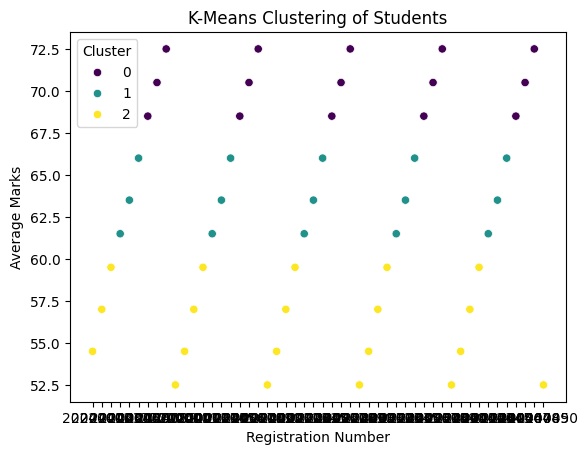

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=df_final["Registration Number"], y=df_final["Average Marks"], hue=df_final["Cluster"], palette="viridis")
plt.xlabel("Registration Number")
plt.ylabel("Average Marks")
plt.title("K-Means Clustering of Students")
plt.show()